In [104]:
import torch
from torch import nn
import torch.functional as F
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import time as ti
import matplotlib.pyplot as plt

In [105]:
train_data = pd.read_csv('./data/processed_data/train_data.csv', sep='^')
valid_data = pd.read_csv('./data/processed_data/validation_data.csv', sep='^')
train_data.info(), valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904757 entries, 0 to 904756
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UserAvgRating   904757 non-null  float64
 1   Occupation      904757 non-null  int64  
 2   Gender          904757 non-null  object 
 3   Age             904757 non-null  int64  
 4   FavGenre        904757 non-null  object 
 5   MovieAvgRating  904757 non-null  float64
 6   Genres          904757 non-null  object 
 7   Year            904757 non-null  int64  
 8   Rating          904757 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95452 entries, 0 to 95451
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserAvgRating   95452 non-null  float64
 1   Occupation      95452 non-null  int64  
 2   Gender          95452 non-nu

(None, None)

In [106]:
train_data.Genres = train_data.Genres.str.split('|')
mlb = MultiLabelBinarizer()
genres = mlb.fit_transform(train_data.Genres)
list_name_genres = mlb.classes_.tolist()
train_data = pd.concat([train_data, pd.DataFrame(genres, columns=list_name_genres)], axis=1)
train_data = train_data.drop(columns=['Genres'])
genres, list_name_genres

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]]),
 ['Action',
  'Adventure',
  'Animation',
  "Children's",
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Fantasy',
  'Film-Noir',
  'Horror',
  'Musical',
  'Mystery',
  'Romance',
  'Sci-Fi',
  'Thriller',
  'War',
  'Western'])

In [107]:
valid_data.Genres = valid_data.Genres.str.split('|')
mlb = MultiLabelBinarizer()
genres = mlb.fit_transform(valid_data.Genres)
valid_data = pd.concat([valid_data, pd.DataFrame(genres, columns=mlb.classes_.tolist())], axis=1)
valid_data = valid_data.drop(columns=['Genres'])
genres, mlb.classes_.tolist()

(array([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 ['Action',
  'Adventure',
  'Animation',
  "Children's",
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Fantasy',
  'Film-Noir',
  'Horror',
  'Musical',
  'Mystery',
  'Romance',
  'Sci-Fi',
  'Thriller',
  'War',
  'Western'])

In [108]:
print(train_data.head(20).to_markdown())

|    |   UserAvgRating |   Occupation | Gender   |   Age | FavGenre   |   MovieAvgRating |   Year |   Rating |   Action |   Adventure |   Animation |   Children's |   Comedy |   Crime |   Documentary |   Drama |   Fantasy |   Film-Noir |   Horror |   Musical |   Mystery |   Romance |   Sci-Fi |   Thriller |   War |   Western |
|---:|----------------:|-------------:|:---------|------:|:-----------|-----------------:|-------:|---------:|---------:|------------:|------------:|-------------:|---------:|--------:|--------------:|--------:|----------:|------------:|---------:|----------:|----------:|----------:|---------:|-----------:|------:|----------:|
|  0 |             4.2 |           10 | F        |     1 | Drama      |              4.4 |   1980 |        5 |        0 |           0 |           0 |            0 |        0 |       0 |             0 |       1 |         0 |           0 |        0 |         0 |         0 |         0 |        0 |          0 |     0 |         0 |
|  1 |       

In [109]:
categ_col_names = ['FavGenre', 'Year', 'Age', 'Gender', 'Occupation']
cont_col_names = ['UserAvgRating', 'MovieAvgRating', *list_name_genres]
output_value = 'Rating'

In [110]:
train_data.shape, valid_data.shape

((904757, 26), (95452, 26))

In [111]:
for cat in categ_col_names:
    train_data[cat] = train_data[cat].astype('category')
for cat in categ_col_names:
    valid_data[cat] = valid_data[cat].astype('category')
train_data.info(), valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904757 entries, 0 to 904756
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   UserAvgRating   904757 non-null  float64 
 1   Occupation      904757 non-null  category
 2   Gender          904757 non-null  category
 3   Age             904757 non-null  category
 4   FavGenre        904757 non-null  category
 5   MovieAvgRating  904757 non-null  float64 
 6   Year            904757 non-null  category
 7   Rating          904757 non-null  int64   
 8   Action          904757 non-null  int32   
 9   Adventure       904757 non-null  int32   
 10  Animation       904757 non-null  int32   
 11  Children's      904757 non-null  int32   
 12  Comedy          904757 non-null  int32   
 13  Crime           904757 non-null  int32   
 14  Documentary     904757 non-null  int32   
 15  Drama           904757 non-null  int32   
 16  Fantasy         904757 non-null  int32

(None, None)

In [112]:
train_data.FavGenre.cat.categories, train_data.FavGenre.cat.codes

(Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
       dtype='object'),
 0          7
 1          7
 2          7
 3          7
 4         14
           ..
 904752     7
 904753     7
 904754    15
 904755     3
 904756     4
 Length: 904757, dtype: int8)

In [113]:
valid_data.FavGenre.cat.categories, valid_data.FavGenre.cat.codes

(Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War'],
       dtype='object'),
 0         2
 1         4
 2         4
 3        14
 4         4
          ..
 95447     4
 95448     7
 95449     7
 95450     7
 95451     7
 Length: 95452, dtype: int8)

In [114]:
categ_data_size = [len(train_data[cat].cat.categories) for cat in categ_col_names]
embedding_size_list = [(cat_sz, min(50, (cat_sz+1)//2)) for cat_sz in categ_data_size]
embedding_size_list

[(18, 9), (5, 3), (7, 4), (2, 1), (21, 11)]

In [115]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device, torch.cuda.get_device_name(0)

(device(type='cuda', index=0), 'NVIDIA GeForce 940M')

In [116]:
np_cont_train = np.stack([train_data[c].values for c in cont_col_names], axis=1)
np_cats_train = np.stack([train_data[c].cat.codes.values for c in categ_col_names], axis=1)
np_y_train = np.stack(train_data[output_value].values).reshape((-1, 1))

np_all_train = np.concatenate((np_cont_train, np_cats_train, np_y_train), axis=1)

np_cont_train.shape, np_cats_train.shape, np_y_train.shape, np_all_train.shape

((904757, 20), (904757, 5), (904757, 1), (904757, 26))

In [117]:
np_cont_valid = np.stack([valid_data[c].values for c in cont_col_names], axis=1)
np_cats_valid = np.stack([valid_data[c].cat.codes.values for c in categ_col_names], axis=1)
np_y_valid = np.stack(valid_data[output_value].values).reshape((-1, 1))

np_all_valid = np.concatenate((np_cont_valid, np_cats_valid, np_y_valid), axis=1)

np_cont_valid.shape, np_cats_valid.shape, np_y_valid.shape, np_all_valid.shape

((95452, 20), (95452, 5), (95452, 1), (95452, 26))

In [118]:
def data_suffler(np_all_training):
    return np.random.permutation(np_all_training)

In [119]:
def my_data_loader(np_all_data, batch_size):
    for i in range(1, len(np_all_data)//batch_size):
        sectioned = np_all_data[(i-1)*batch_size:i*batch_size]

        tensor_conts = torch.tensor(sectioned[:, :len(cont_col_names)], dtype=torch.float32).to(device)
        tensor_cats = torch.tensor(sectioned[:, len(cont_col_names):-1], dtype=torch.int32).to(device)
        tensor_y = torch.tensor(sectioned[:, -1], dtype=torch.float32).flatten().to(device)

        yield tensor_conts, tensor_cats, tensor_y

In [120]:
class TabularModel(nn.Module):
    def __init__(self, cat_list:list, cat_embedding_sizes:list, cont_list:list, layers_units:list, output_units:int, p_drop:float = 0.3) -> None:
        super().__init__()

        self.embed_layers = nn.ModuleList([nn.Embedding(*cat_embd_size) for cat_embd_size in cat_embedding_sizes])   # cat_data is (input_embedding, dim_embedding)
        self.embed_drop = nn.Dropout(p_drop)
        self.batch_norm_cont = nn.BatchNorm1d(len(cont_list))

        input_size = sum([cat_embd_size[1] for cat_embd_size in cat_embedding_sizes]) + len(cont_list)
    
        layers = []
        for layer_num in range(len(layers_units)):
            if layer_num == 0:
                layers.append(nn.Linear(input_size, layers_units[0]))
                layers.append(nn.ReLU(inplace=True))
                layers.append(nn.BatchNorm1d(layers_units[0]))
                layers.append(nn.Dropout(p_drop))
                continue
            layers.append(nn.Linear(layers_units[layer_num-1], layers_units[layer_num]))
            layers.append(nn.ReLU(inplace=True))
            layers.append(nn.BatchNorm1d(layers_units[layer_num]))
            layers.append(nn.Dropout(p_drop))
        layers.append(nn.Linear(layers_units[-1], output_units))

        self.layers = nn.Sequential(*layers)

    def forward(self, cat_tensor, cont_tensor):
        embeddings = []
        for ind, embd_lay in enumerate(self.embed_layers):
            embeddings.append(embd_lay(cat_tensor[:,ind]))
        cat_tensor = torch.cat(embeddings, axis=1)
        cat_tensor = self.embed_drop(cat_tensor)
        
        cont_tensor = self.batch_norm_cont(cont_tensor)
        x = torch.cat([cat_tensor, cont_tensor], axis=1)
        x = self.layers(x)
        return x
        

In [121]:
torch.manual_seed(42)
model = TabularModel(cat_list=categ_col_names,
                    cat_embedding_sizes=embedding_size_list,
                    cont_list=cont_col_names,
                    layers_units=[100, 50, 20, 10],
                    output_units=1,
                    p_drop = 0.3)
model = model.to(device)
next(model.parameters()).is_cuda, model

(True,
 TabularModel(
   (embed_layers): ModuleList(
     (0): Embedding(18, 9)
     (1): Embedding(5, 3)
     (2): Embedding(7, 4)
     (3): Embedding(2, 1)
     (4): Embedding(21, 11)
   )
   (embed_drop): Dropout(p=0.3, inplace=False)
   (batch_norm_cont): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (layers): Sequential(
     (0): Linear(in_features=48, out_features=100, bias=True)
     (1): ReLU(inplace=True)
     (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (3): Dropout(p=0.3, inplace=False)
     (4): Linear(in_features=100, out_features=50, bias=True)
     (5): ReLU(inplace=True)
     (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (7): Dropout(p=0.3, inplace=False)
     (8): Linear(in_features=50, out_features=20, bias=True)
     (9): ReLU(inplace=True)
     (10): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (11): 

In [122]:
[param.numel() for param in model.parameters()]

[162,
 15,
 28,
 2,
 231,
 20,
 20,
 4800,
 100,
 100,
 100,
 5000,
 50,
 50,
 50,
 1000,
 20,
 20,
 20,
 200,
 10,
 10,
 10,
 10,
 1]

In [123]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [124]:
start_time = ti.time()
epochs = 10
train_losses = []
train_losses_per_epoch = []
valid_losses_per_epoch = []
for epoch in range(epochs):
    model.train()
    data_loader = my_data_loader(data_suffler(np_all_train), batch_size=10000)
    for cnt, (tensor_conts_train, tensor_cats_train, tensor_y_train) in enumerate(data_loader):
        pred = model(tensor_cats_train, tensor_conts_train)
        loss = torch.sqrt(criterion(pred, tensor_y_train))     # this means RMSE
        
        if cnt % 40 == 0:
            train_losses.append(loss)
            print(f'batch number: {cnt} from epoch: {epoch}, loss is {loss}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_losses_per_epoch.append(loss)
    print(f'final loss after epoch: {epoch}, loss is {loss}')


    model.eval()
    with torch.no_grad():
        data_loader = my_data_loader(data_suffler(np_all_valid), batch_size=10000)
        loss_list = []
        for cnt, (tensor_conts_valid, tensor_cats_valid, tensor_y_valid) in enumerate(data_loader):
            pred = model(tensor_cats_valid, tensor_conts_valid)
            loss_list.append(torch.sqrt(criterion(pred, tensor_y_valid)).item())
        valid_losses_per_epoch.append(np.array(loss_list).mean())
        print(f'validation loss after epoch: {epoch}, loss is {np.array(loss_list).mean()}')

duration = ti.time() - start_time
print(f'training took {duration/60} minutes')

c:\Users\Sajjad\anaconda3\envs\myMLEnv\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([10000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


batch number: 0 from epoch: 0, loss is 3.9639718532562256
batch number: 40 from epoch: 0, loss is 3.8474857807159424
batch number: 80 from epoch: 0, loss is 3.7339401245117188
final loss after epoch: 0, loss is 3.7172980308532715
validation loss after epoch: 0, loss is 3.5652377903461456
batch number: 0 from epoch: 1, loss is 3.695711135864258
batch number: 40 from epoch: 1, loss is 3.489659547805786
batch number: 80 from epoch: 1, loss is 3.21520733833313
final loss after epoch: 1, loss is 3.1345949172973633
validation loss after epoch: 1, loss is 2.978017210960388
batch number: 0 from epoch: 2, loss is 3.1483347415924072
batch number: 40 from epoch: 2, loss is 2.7780957221984863
batch number: 80 from epoch: 2, loss is 2.370748519897461
final loss after epoch: 2, loss is 2.269590377807617
validation loss after epoch: 2, loss is 2.035833865404129
batch number: 0 from epoch: 3, loss is 2.270618200302124
batch number: 40 from epoch: 3, loss is 1.8953990936279297
batch number: 80 from epo

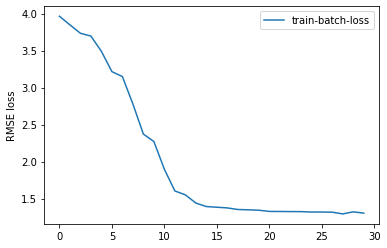

In [125]:
plt.plot(train_losses, label='train-batch-loss')
plt.ylabel('RMSE loss')
plt.legend()
plt.show()

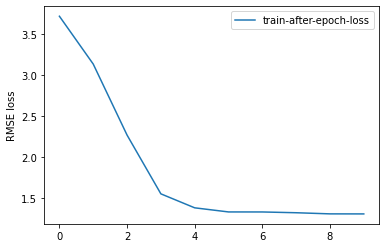

In [126]:
plt.plot(train_losses_per_epoch, label='train-after-epoch-loss')
plt.ylabel('RMSE loss')
plt.legend()
plt.show()

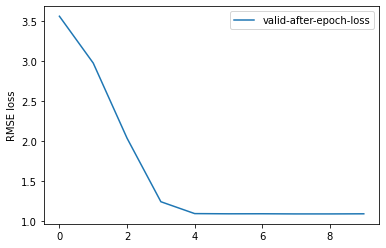

In [127]:
plt.plot(valid_losses_per_epoch, label='valid-after-epoch-loss')
plt.ylabel('RMSE loss')
plt.legend()
plt.show()